In [10]:
import librosa as rosa
import matplotlib.pyplot as plt
import numpy as np
import math

N1 = 22050
N2 = 16000
n = min(N1, N2)

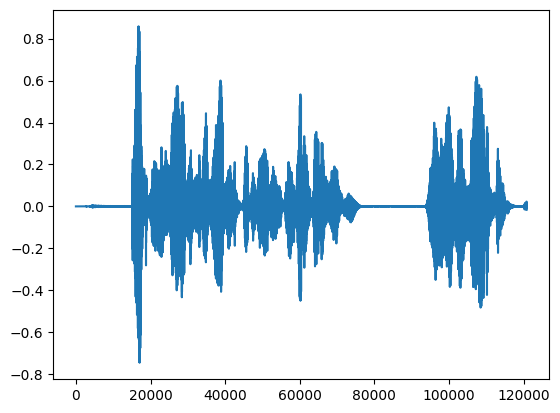

In [11]:
record, N1 = rosa.load("record.wav")
record_duration = rosa.get_duration(y=record, sr=N1)

plt.plot(record)
plt.show()

In [12]:
# Растяжение

stretched_record = np.empty(shape=N2 * record.size)

last_element = None
for i in range(stretched_record.size):
    if i % N2 == 0:
        stretched_record[i] = record[i // N2]
        last_element = stretched_record[i]
    else:
        stretched_record[i] = last_element

In [ ]:
from scipy import signal
b, a = signal.butter(3, 0.46)
filtered_record = signal.lfilter(b, a, stretched_record)

In [6]:
# Прореживание

thinned_record = np.zeros(shape=math.ceil(record_duration * N2))
print(thinned_record.size)

for j in range(thinned_record.size):
    thinned_record[j] = filtered_record[j * N1]

80249


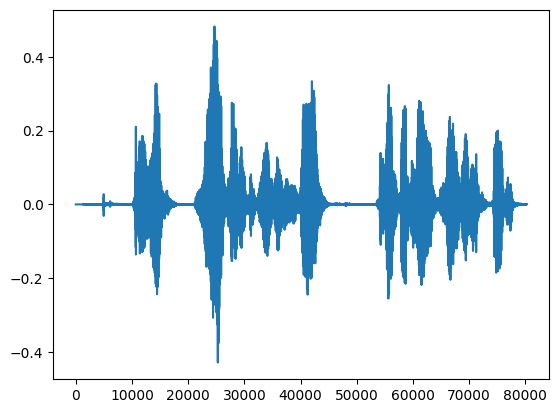

In [7]:
import soundfile as sf
sf.write('out.wav', thinned_record, N2)

plt.plot(thinned_record)